<h1><center>Analysis of Onion Market Dynamics</center></h1>
<p><center>By Amaan Makandar and Keith Lee</center><p>
<hr>

# Introduction

Agriculture remains a cornerstone of global economies, providing essential resources such as food, raw materials, and employment. In particular, the production and pricing of agricultural commodities, like onions, are critical to the stability of food markets and the livelihoods of farmers and consumers. Understanding and predicting the fluctuations in the supply and prices of such commodities are vital for policymakers, traders, and stakeholders of onions within the agricultural sector to maximize benefit.

Onions, a staple ingredient in cuisines worldwide, have seen volatile price movements, often influenced by factors such as weather conditions, pest outbreaks, and market demand. This volatility can have far-reaching consequences, affecting everything from the economic well-being of farmers to the cost of living for consumers. Analyzing the time series data of onion prices is essential for developing strategies to maximize cost efficiency when buying and selling onions.

Data science techniques offer robust tools for analyzing complex data patterns, making accurate forecasts, and deriving actionable insights. By leveraging time series analysis, machine learning, and predictive modeling, we can uncover trends and anomalies within the agricultural market data that would be difficult to detect through traditional methods.

# Data Collection

For this analysis, we are utilizing the Onion Time Series Dataset obtained from Kaggle, which can be accessed via [this link](https://www.kaggle.com/datasets/chopper53/onion-time-series-dataset?resource=download). The dataset aims to provide insights into onion market dynamics, including trends in arrivals, pricing variations, and modal price trends over time. We can utilize this dataset to analyze market behavior, assess pricing patterns, and identify factors influencing onion pricing fluctuations.

The dataset includes the following features:
- **Commodity**: Type of commodity, with a focus on onions.
- **Date**: Date of observation for the onion market data.
- **Arrivals in Qtls.**: Quantity of onions arriving in the market, measured in quintals (Qtls.).
- **Min**: Minimum price observed for onions on the given date.
- **Max**: Maximum price observed for onions on the given date.
- **Modal**: Modal price of onions, representing the most frequently occurring price range.

<b>Imports</b>

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

### Libraries and Tools Used

**Pandas**: A powerful data manipulation and analysis library for Python. It provides data structures like DataFrames, which are essential for handling and analyzing structured data efficiently. In this project, Pandas will be used to load, clean, and preprocess the Onion Time Series Dataset.

**NumPy**: A fundamental package for numerical computing in Python. It supports large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays. NumPy will be utilized for various numerical operations and handling missing data.

**Matplotlib**: A plotting library for creating static, interactive, and animated visualizations in Python. Matplotlib will be used to generate plots and graphs that help visualize trends, patterns, and distributions in the onion market data.

**Seaborn**: A statistical data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Seaborn will be used to create more sophisticated and aesthetically pleasing plots for the dataset analysis.

**seasonal_decompose**: A function from the Statsmodels library that performs seasonal decomposition of time series data. It separates the data into trend, seasonal, and residual components. This will be crucial for understanding the underlying patterns and seasonal effects in onion prices.

**adfuller**: The Augmented Dickey-Fuller test, available in the Statsmodels library, is used to check for stationarity in time series data. Stationarity is a key assumption in many time series forecasting methods. The ADF test will help determine whether the onion price data is stationary or if differencing is required to make it stationary.

### Reading in the Data

In [89]:
global_df = pd.read_csv('onion_timeseries_data.csv')

# Display the first few rows of the DataFrame
print(global_df.head(), '\n')

# Check the data types of each column
print(global_df.dtypes)

  Commodity        Date  Arrivals in Qtls.   Min   Max  Modal
0     ONION   5/12/2015             158796   439  1538   1046
1     ONION    8/2/2015              37413  1789  3808   3054
2     ONION  10/23/2015              45384  1122  3035   2273
3     ONION   1/13/2016             271679   547  1468   1147
4     ONION   3/10/2016             261306   408   871    704 

Commodity            object
Date                 object
Arrivals in Qtls.     int64
Min                   int64
Max                   int64
Modal                 int64
dtype: object


# Data Processing

In [90]:
# Commodity column is not needed, it is always Onion
df = global_df.drop(columns=['Commodity'])

# Update column names for ease of use
df.columns = ['date', 'quantity', 'min', 'max', 'modal']

# Segmenting date to hold data >= 2015
df['date'] = pd.to_datetime(df['date'])
df = df[df['date'] >= '2015-01-01']
df = df.sort_values(by='date')

# Add a column for the day of the week and month
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month

# Set date to index
df.set_index('date', inplace=True)

# Display the first few rows of the DataFrame
print(df.head())

            quantity  min   max  modal  day_of_week  month
date                                                      
2015-01-01    192433  633  1563   1126            3      1
2015-01-02    183317  612  1568   1147            4      1
2015-01-03    107223  476  1662   1140            5      1
2015-01-04     40997  545  1687   1125            6      1
2015-01-05    238692  560  1646   1211            0      1


# Exploratory Analysis & Data Visualization

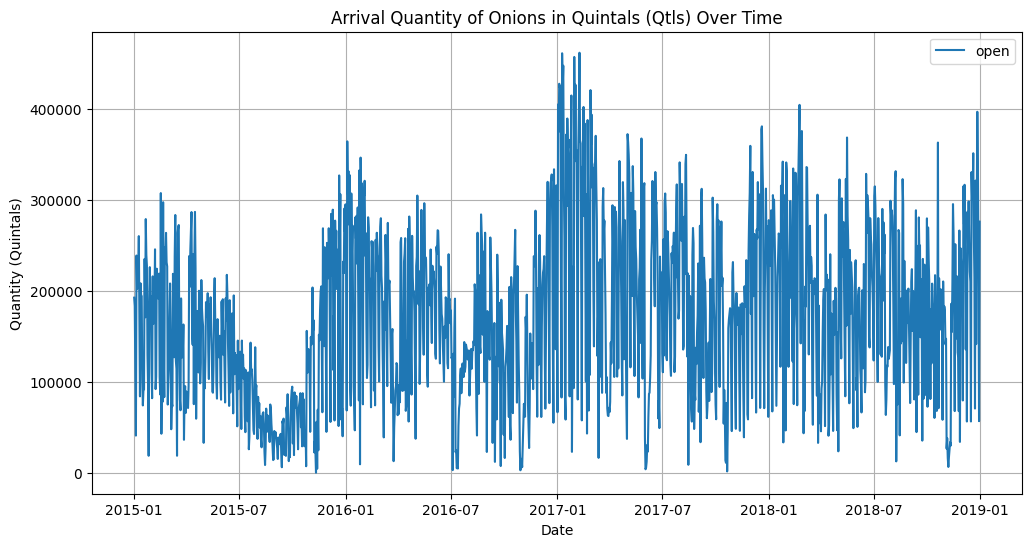

In [91]:
# Plotting Quantity
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['quantity'], label='open')
plt.title('Arrival Quantity of Onions in Quintals (Qtls) Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity (Quintals)')
plt.legend()
plt.grid(True)
plt.show()

From the graph, we can observe that the arrival quantity of onions in Quintals (Qtls) exhibits high volatility and lacks discernible seasonal patterns. The significant fluctuations make it challenging to identify any anomalies with confidence. Moreover, there does not appear to be a noticeable trend in the arrival quantities over time. This high level of volatility suggests that the market may influenced by various unpredictable factors, making it difficult to draw clear conclusions about underlying patterns or trends.

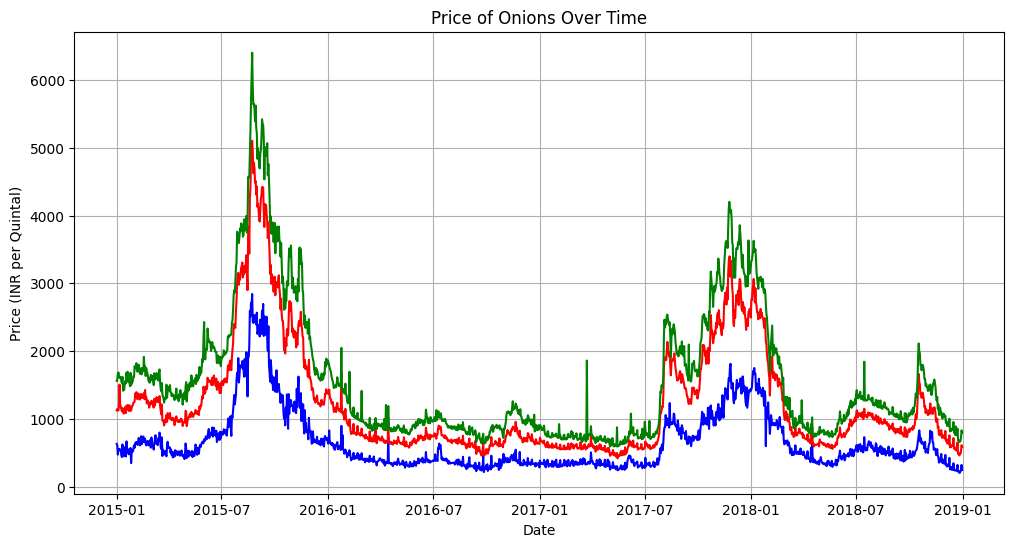

In [92]:
# Plotting min, max, and modal
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['min'], color='blue')
plt.plot(df.index, df['modal'], color='red')
plt.plot(df.index, df['max'], color='green')
plt.title('Price of Onions Over Time')
plt.xlabel('Date')
plt.ylabel('Price (INR per Quintal)')
plt.grid(True)
plt.show()


The graph illustrating the minimum, maximum, and modal prices of onions over time provides a comprehensive view of the price fluctuations in the market. The blue line represents the minimum price, the red line denotes the modal price, and the green line shows the maximum price. It seems that prices are typically higher at the latter half of the year and that there were major spikes in price in the latter half of 2015 and 2017. 

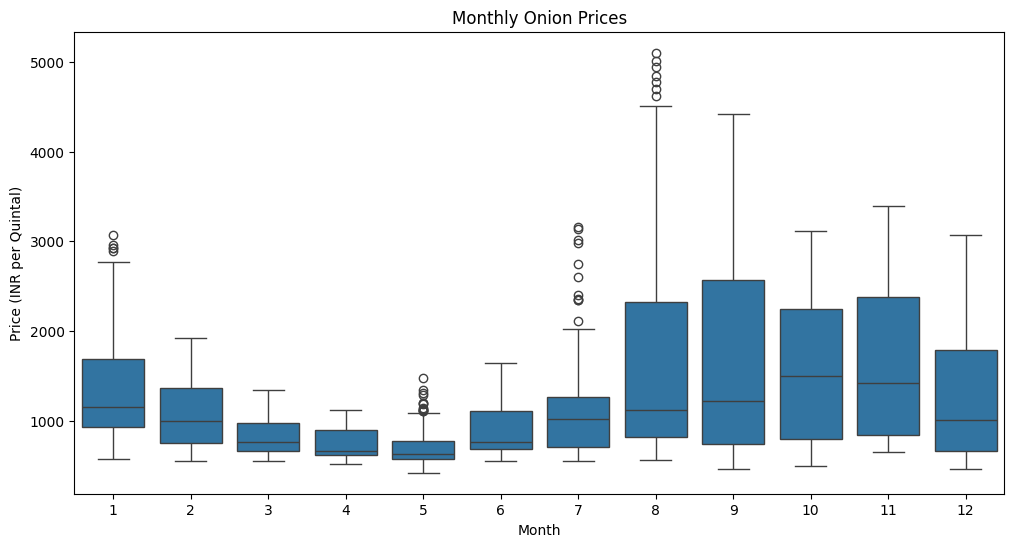

In [93]:
# Box plot to show modal price in each month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='modal', data=df)
plt.xlabel('Month')
plt.ylabel('Price (INR per Quintal)')
plt.title('Monthly Onion Prices')
plt.show()

The boxplot shows the modal price of a Quintal of Onions in each month. This boxplot confirms the notion from the previous graph that Onion prices are typically higher in the latter half of the year. It also seems like the median price of Onions oscillates around 1,000 INR througout the year.  

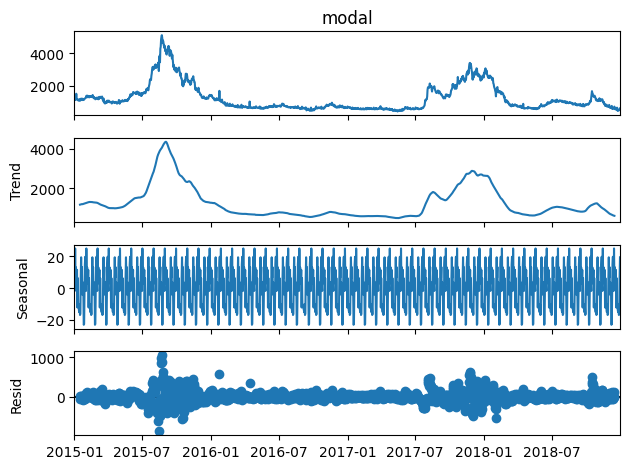

In [97]:
# Decomposition
result = seasonal_decompose(df['modal'], model='additive', period=30)
result.plot()
plt.show()

The trend component reveals the long-term movement in onion prices, showing significant peaks around mid-2015 and mid-2017. Following these peaks, the trend generally shows a gradual decline with some fluctuations, stabilizing towards the end of the period.
<br><br>
The seasonal component reveals a repeating pattern with a periodicity of approximately one year. This consistent cyclic behavior highlights the seasonal nature of onion prices. The seasonal peaks and troughs indicate higher prices during certain months and lower prices during others, likely corresponding to the agricultural cycle of planting and harvesting onions. 
<br><br>
There is notable volatility in the residuals, especially around mid-2015, suggesting the presence of unexpected events or anomalies during this period.

# Analysis, Hypothesis Testing, & Machine Learning

In [95]:
# Stationarity test
adf_test = adfuller(df['modal'])
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

ADF Statistic: -2.7362774649980666
p-value: 0.0679682937132198


Based on the ADF test results, with a p-value of 0.068, we fail to reject the null hypothesis that the modal price time series is non-stationary. This implies that the time series may indeed be non-stationary, meaning its statistical properties change over time.

# Insight & Policy Decision